In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# Define the path to your dataset folder in Google Drive
data_dir = '/content/drive/MyDrive/Gesture Image Data'

In [ ]:
Name = os.listdir(data_dir)
print(Name)

['_', 'S', 'T', 'W', 'U', 'Y', 'V', 'X', 'R', 'Z', 'Q', 'P', 'F', 'H', 'G', 'L', 'N', 'M', 'K', 'I', 'O', 'J', 'E', 'D', '4', 'A', '6', '5', '8', '7', 'C', '9', 'B', '3', '2', '0', '1']


In [ ]:
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

In [ ]:
dataset=[]
dataname=[]
count=0
for name in tqdm(os.listdir(data_dir)):
    path=os.path.join(data_dir,name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        dataset+=[image]
        dataname+=[count]
    count=count+1

100%|██████████| 37/37 [00:58<00:00,  1.59s/it]


In [ ]:
data=np.array(dataset)
dataname=np.array(dataname)


In [ ]:
print(pd.Series(dataname).value_counts())

21    292
14    292
18    200
19    200
22    200
23    200
24    200
25    200
26    200
27    200
28    200
29    200
30    200
31    200
32    200
34    200
35    200
20    200
36    200
1     200
17    200
2     200
3     200
4     200
5     200
6     200
7     200
8     200
9     200
10    200
11    200
12    200
13    200
15    200
16    200
0     198
33    176
Name: count, dtype: int64


In [ ]:
# Shuffling the data
m=len(data)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [ ]:
# Splitting into train and test sets
trainX=data[M[0:(m//4)*3]]
trainY0=dataname[M[0:(m//4)*3]]

testX=data[M[(m//4)*3:]]
testY0=dataname[M[(m//4)*3:]]

In [ ]:
# One-hot encoding labels
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [ ]:
# Further splitting train data into train and validation sets
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4533, 50, 50, 3)
(1134, 50, 50, 3)
(4533, 37)
(1134, 37)


In [ ]:
# Image augmentation
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
# Load ResNet50 as the base model, exclude top layers, and use ImageNet weights
pretrained_model3 = tf.keras.applications.ResNet50(input_shape=(50, 50, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model3.trainable = False  # Freeze the layers of ResNet

In [ ]:
# Add custom layers on top of ResNet50
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model with data augmentation
his = model.fit(datagen.flow(trainx, trainy, batch_size=32), # Remove target_size
                validation_data=(testx, testy), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 89s 561ms/step - accuracy: 0.4495 - loss: 2.0368 - val_accuracy: 0.8774 - val_loss: 0.3678
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 78s 546ms/step - accuracy: 0.8390 - loss: 0.5142 - val_accuracy: 0.8624 - val_loss: 0.3726
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 70s 496ms/step - accuracy: 0.8836 - loss: 0.3557 - val_accuracy: 0.9312 - val_loss: 0.1846
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 72s 507ms/step - accuracy: 0.8930 - loss: 0.3378 - val_accuracy: 0.9727 - val_loss: 0.0832
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 71s 496ms/step - accuracy: 0.9231 - loss: 0.2549 - val_accuracy: 0.9612 - val_loss: 0.1082
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 85s 519ms/step - accuracy: 0.9316 - loss: 0.2317 - val_accuracy: 0.9242 - val_loss: 0.2598
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 78s 548ms/step - accuracy: 0.9321 - loss: 0.2200 - val_accuracy: 0.9735 - val_loss: 0.0931
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 75s 494ms/step - accuracy: 0.9523 - loss: 0.1376 - val

In [ ]:
# Make predictions on the test set
y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(testy, axis=1)
print(classification_report(ground, pred))

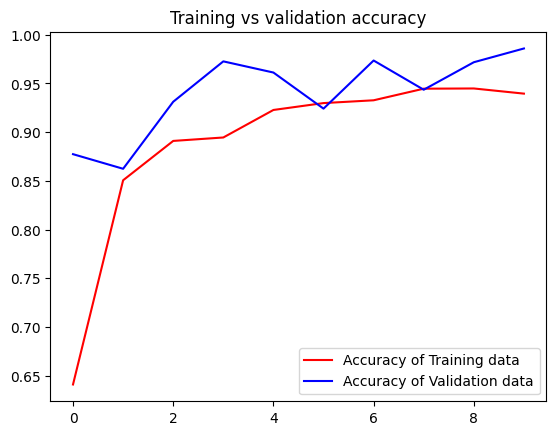

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting training accuracy and validation accuracy
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()